In [459]:
%matplotlib inline
from delay_char import DlyLineDlog
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
from collections import Counter

In [460]:
def data2df(lot_num, temp):
    dly = DlyLineDlog(os.path.join(".\\data\\Delay_line\\", lot_num, temp, "summary_" + temp + '.txt'), temp, lot_num)
    df_lst = dly.gen_df_lst()
    return pd.DataFrame(df_lst)



lotnum = "RC01927M"
temp = '25C'
df = data2df(lotnum, temp)
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))
lotnum = "RC01928M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

lotnum = "RC01929M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

df.columns = ['Lot', 'Temp', 'Dev#', 'VDD', 'Test', 'Data0', 'Data1']

In [461]:
# def slice_unit(dev_num, lot_num, temp='all', data_frame=df):
#     if isinstance(dev_num, list):
#         for x in dev_num:
#             if temp == 'all':
#                 data_sliced = data_frame.loc[(data_frame.Lot != lot_num) | (data_frame['Dev#'] != x)]
#             else:
#                 data_sliced = data_frame[(data_frame.Lot != lot_num) | (data_frame.Temp != temp) | (data_frame['Dev#'] != x)]
#     else:
#         if temp == 'all':
#             data_sliced = data_frame.loc[(data_frame.Lot != lot_num) | (data_frame['Dev#'] != dev_num)]
#         else:
#             data_sliced = data_frame[(data_frame.Lot != lot_num) | (data_frame.Temp != temp) | (data_frame['Dev#'] != dev_num)]
#             print(data_frame[(data_frame.Lot == lot_num) & (data_frame.Temp == temp) & (data_frame['Dev#'] == dev_num)])
#             print(data_sliced[(data_frame.Lot == lot_num) & (data_frame.Temp == temp) & (data_frame['Dev#'] == dev_num)])
#     del data_frame
#     return data_sliced

In [462]:
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 20) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 26) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 21) | (df.Temp != '105C')]

df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 4) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 3) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 17) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 3) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 16) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 4) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 5) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 6) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 19) | (df.Temp != '-5C')]

df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 20) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 21) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 25) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 20) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 21) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 25) | (df.Temp != '105C')]

df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 9)]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 9)]
# df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 17)]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 14)]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 2)]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 15)]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 24)]


# slice_unit([20, 26], 'RC01928M', '25C')
# df = slice_unit(21, 'RC01928M', '105C')
# df = slice_unit(4, 'RC01927M', '25C')
# df = slice_unit([20, 21, 25], 'RC01929M', '25C')
# df = slice_unit([20, 21, 25], 'RC01929M', '105C')
# df = slice_unit(9, 'RC01928M')

In [463]:
def confirm_units(lot_num):
    units = len(Counter(df[(df.Lot == lot_num) & (df.Temp == '25C')]['Dev#']).keys())
    if ((units == len(Counter(df[(df.Lot == lot_num) & (df.Temp == '105C')]['Dev#']).keys())) and 
        (units == len(Counter(df[(df.Lot == lot_num) & (df.Temp == '-5C')]['Dev#']).keys()))):
        print("Lot " + lot_num + " has " + str(units))
    else:
        print("Units Number not Match")

In [464]:
confirm_units('RC01927M')

Lot RC01927M has 21


In [465]:
confirm_units('RC01928M')

Lot RC01928M has 20


In [466]:
confirm_units('RC01929M')

Lot RC01929M has 20


In [467]:
df.loc[df.Test == 'Delay', 'Data1'] = df[df.Test == 'Delay'].Data1.astype(int)

In [469]:
df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.describe()

count    1830.000000
mean        3.822418
std         0.158090
min         3.452000
25%         3.704000
50%         3.812000
75%         3.938000
max         4.239000
Name: Data0, dtype: float64

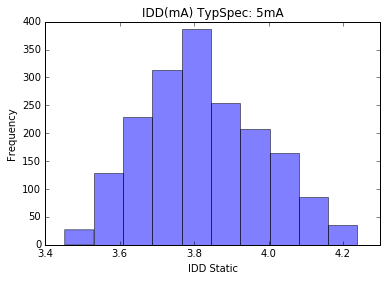

In [470]:
plt_idd_stat = df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.plot(kind='hist', alpha=0.5, title='IDD(mA) TypSpec: 5mA')
plt_idd_stat.set_xlabel("IDD Static")
plt_idd_stat.set_ylabel("Frequency")

In [479]:
df[(df.Test == 'VOL') & (df.Data1 == '10mA')].Data0.describe()

count    1830.000000
mean        0.252538
std         0.006715
min         0.242000
25%         0.247000
50%         0.251000
75%         0.257000
max         0.278000
Name: Data0, dtype: float64

In [482]:
df[(df.Test == 'VOL') & (df.Data1 == '1mA')].Data0.describe()

count    1830.000000
mean        0.026378
std         0.001650
min         0.022000
25%         0.026000
50%         0.027000
75%         0.027000
max         0.030000
Name: Data0, dtype: float64

In [480]:
df[(df.Test == 'VOH') & (df.Data1 == '10mA')].Data0.describe()

count    1830.000000
mean        3.001946
std         0.292007
min         2.523000
25%         2.752000
50%         2.998500
75%         3.259750
max         3.466000
Name: Data0, dtype: float64

In [481]:
df[(df.Test == 'VOH') & (df.Data1 == '1mA')].Data0.describe()

count    1830.000000
mean        3.221962
std         0.287773
min         2.765000
25%         2.972000
50%         3.220500
75%         3.474000
max         3.675000
Name: Data0, dtype: float64

In [484]:
df[(df.Test == 'VIH')].Data0.describe()

count    1830.000000
mean        1.906585
std         0.152639
min         1.650000
25%         1.800000
50%         1.900000
75%         2.050000
max         2.200000
Name: Data0, dtype: float64

In [485]:
df[(df.Test == 'VIL')].Data0.describe()

count    1830.000000
mean        1.639399
std         0.151797
min         1.350000
25%         1.500000
50%         1.650000
75%         1.750000
max         1.900000
Name: Data0, dtype: float64

In [471]:
df.loc[df.Test == 'Delay', 'Dly'] = df[df.Test == 'Delay'].apply(lambda x: (x['Data0'] * 1000 - int(x['Data1'])) / int(x['Data1']) * 100, axis=1)

In [472]:
df_dly = df[df.Test == 'Delay']

In [473]:
df_dly[df_dly['Data1'] < 8000]['Dly'].describe()

count    73200.000000
mean         0.904542
std          1.327834
min         -3.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.500000
Name: Dly, dtype: float64

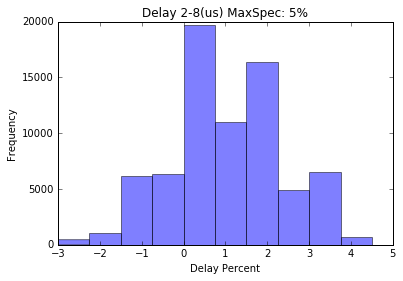

In [474]:
plt_range1 = df_dly[df_dly['Data1'] < 8000]['Dly'].plot(kind='hist', alpha=0.5, title='Delay 2-8(us) MaxSpec: 5%')
plt_range1.set_xlabel("Delay Percent")
plt_range1.set_ylabel("Frequency")

In [475]:
df_dly[df_dly['Data1'] >= 8000].Dly.describe()

count    111630.000000
mean          0.496099
std           0.734960
min          -2.000000
25%           0.000000
50%           0.595745
75%           1.000000
max           2.604651
Name: Dly, dtype: float64

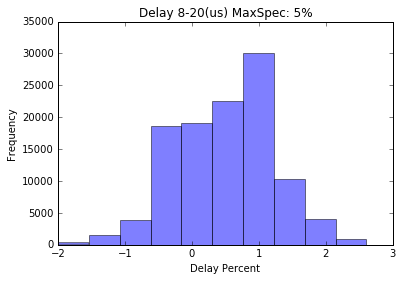

In [476]:
plt_range2 = df_dly[df_dly['Data1'] >= 8000]['Dly'].plot(kind='hist', alpha=0.5, title='Delay 8-20(us) MaxSpec: 3%')
plt_range2.set_xlabel("Delay Percent")
plt_range2.set_ylabel("Frequency")

In [477]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 >= 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
17878,RC01927M,105C,18,2.9,Delay,8.720,8600,1.395349
17878,RC01928M,25C,19,2.9,Delay,8.755,8600,1.802326
17878,RC01928M,105C,17,2.9,Delay,8.789,8600,2.197674
17878,RC01928M,-5C,17,2.9,Delay,8.755,8600,1.802326
17878,RC01929M,25C,17,2.9,Delay,8.755,8600,1.802326
17878,RC01929M,105C,17,2.9,Delay,8.824,8600,2.604651
17878,RC01929M,-5C,17,2.9,Delay,8.755,8600,1.802326


In [478]:
df_dly[df_dly.index == [df_dly[(df_dly.Data1 < 8000)].Dly.argmax()]]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
18539,RC01927M,25C,18,2.8,Delay,2.03,2000,1.5
18539,RC01927M,105C,19,2.8,Delay,2.06,2000,3.0
18539,RC01927M,-5C,20,2.8,Delay,2.02,2000,1.0
18539,RC01928M,105C,19,2.8,Delay,2.09,2000,4.5
18539,RC01928M,-5C,18,2.8,Delay,2.09,2000,4.5
18539,RC01929M,25C,18,2.8,Delay,2.00,2000,0.0
18539,RC01929M,105C,18,2.8,Delay,2.02,2000,1.0
18539,RC01929M,-5C,18,2.8,Delay,2.01,2000,0.5
